In [58]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x=[80,85,90,95,100]
trf2index={"traffic80":0,"traffic85":1,"traffic90":2,"traffic95":3,"traffic100":4}
f2name={"linear_1.2_fct_cdf_results":linear_1_2,"sp_1.2_fct_cdf_results":sp_1_2,"ecmp_1.2_fct_cdf_results":ecmp_1_2,"ppo500_1.2_fct_cdf_results":ppo_1_2}
#f2name={'flow_sp_utilization_reset':sp_1_2,'flow_ecmp_utilization_reset':ecmp_1_2,'flow_ppo_utilization_reset':ppo_1_2,'flow_linear_utilization_reset':linear_1_2,}
pathDir=os.listdir("statis/nbgf/")
for file in pathDir:
    path=os.listdir("statis/nbgf/"+file)
    #print(file)
    for f in path:
        #print(f)
        with open("statis/nbgf/"+file+"/"+f,"r") as t:
            a=np.std([float(t.strip().split(" ")[1]) for t in t.readlines()])
            #b=max([float(t.strip().split(" ")[1]) for t in t.readlines()])
            print(a)
            #print(b)
            f2name[f][trf2index[file]]=a
    print('----')

traffic80
ppo500_1.2_fct_cdf_results
28095.57196381355
ecmp_1.2_fct_cdf_results
34955.23337427021
linear_1.2_fct_cdf_results
61767.17036031985
sp_1.2_fct_cdf_results
152699.7414056553
----
traffic95
ppo500_1.2_fct_cdf_results
24010.85407350132
ecmp_1.2_fct_cdf_results
189921.90078795838
sp_1_fct_cdf_results
9508.525575897664


KeyError: 'sp_1_fct_cdf_results'

In [63]:
#original data
import numpy as np
#rtt-avg
# ecmp=[9.385,10.035]
# sp=[8.687,8.867]
# ppo=[9.670,9.858]
# linear=[8.950,9.609]
#rtt-mdev
# ecmp=[3.213,3.125]
# sp=[2.416,2.041]
# ppo=[3.151,2.412]
# linear=[1.947,2.965]
#rtt-bgf-avg
# ecmp=[16.215,11.111]
# sp=[15.794,13.372]
# ppo=[12.863,10.588]
# linear=[21.880,18.813]
#rtt-bgf-mdev
ecmp=[12.489,8.040]
sp=[14.122,11.259]
ppo=[8.308,7.919]
linear=[17.563,12.904]
print(np.mean(ecmp),np.mean(sp),np.mean(ppo),np.mean(linear))
print(np.std(ecmp),np.std(sp),np.std(ppo),np.std(linear))

10.2645 12.6905 8.1135 15.2335
2.224500000000001 1.4314999999999998 0.19450000000000012 2.3294999999999995


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


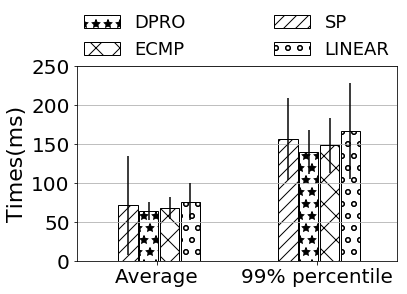

In [146]:
#fct-1-2.pdf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

width = 6
high = width * 0.618
fig_size = [width, high]
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(0.5, 2.5)
ax.set_ylim(0, 250)

ticks_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ticks_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ax.set_xticks([1,2])

ax.set_yticks([0, 50,100,150,200,250])
ax.set_yticklabels(("0", "50","100","150","200","250"), fontdict=ticks_font_y)

# 设置x，y轴名称标签
label_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22} 
label_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22}  
width = 0.12

#fct
ax.set_xticklabels(("Average", "99% percentile"), fontdict=ticks_font_x)
ax.set_ylabel(ylabel="Times(ms)", fontdict=label_font_y)
SP=[71.20394715447155,156.65085162601626]
sp_std=[63.362275307629294,52.6997414056553]
PPO=[63.94364356435643,139.99840594059406]
ppo_std=[10.99416948185382,28.09557196381355]
ECMP=[67.77695,148.2635175]
ecmp_std=[13.620794439660998,34.95523337427021]
LINEAR=[75.86070391061452,166.90883798882682]
linear_std=[23.79384281164142,61.76717036031985]

b=plt.bar(x-0.5*width+0.01,PPO,width=width,fill=False,yerr=ppo_std,label='DPRO',fc='crimson',hatch="*")
c=plt.bar(x+0.5*width+0.02,ECMP,fill=False,yerr=ecmp_std,width=width,label='ECMP',fc='#3cb371',hatch="x")
a=plt.bar(x-1.5*width,SP,fill=False,yerr=sp_std,width=width,label='SP',fc='dodgerblue',hatch="//")
d=plt.bar(x+1.5*width+0.03,LINEAR,fill=False,yerr=linear_std,width=width,label="LINEAR",fc='#a4a09b',hatch='o')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0,1.0,1.0,1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=18, frameon=False)
plt.savefig('pic/fct-1-2.pdf', format='pdf' ,dpi=1000,bbox_inches="tight")
#plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


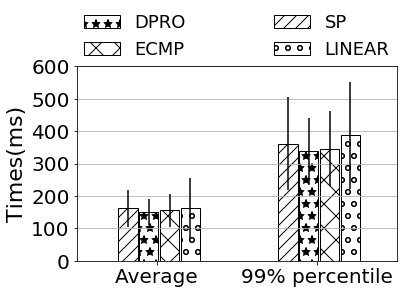

In [145]:
#fct-with-bgf-1-2.pdf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

width = 6
high = width * 0.618
fig_size = [width, high]
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(0.5, 2.5)
ax.set_ylim(0, 600)

ticks_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ticks_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ax.set_xticks([1,2])

ax.set_yticks([0, 100,200,300 ,400,500, 600])
ax.set_yticklabels(("0", "100","200","300","400","500","600"), fontdict=ticks_font_y)

# 设置x，y轴名称标签
label_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22} 
label_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22}  
width = 0.12

#fct-with-bgf
ax.set_xticklabels(("Average", "99% percentile"), fontdict=ticks_font_x)
ax.set_ylabel(ylabel="Times(ms)", fontdict=label_font_y)
SP=[161.762125,361.051815]
sp_std=[57.138726457450684,143.32664456482185]
PPO=[150.973385,337.19618]
ppo_std=[40.38458288865843,102.34381799969058]
ECMP=[155.53325,345.284495]
ecmp_std=[49.81697761845353,115.70293837249759]
LINEAR=[161.33914,387.030995]
linear_std=[93.78295507895331,165.5192264019732]

b=plt.bar(x-0.5*width+0.01,PPO,width=width,fill=False,yerr=ppo_std,label='DPRO',fc='crimson',hatch="*")
c=plt.bar(x+0.5*width+0.02,ECMP,fill=False,yerr=ecmp_std,width=width,label='ECMP',fc='#3cb371',hatch="x")
a=plt.bar(x-1.5*width,SP,fill=False,yerr=sp_std,width=width,label='SP',fc='dodgerblue',hatch="//")
d=plt.bar(x+1.5*width+0.03,LINEAR,fill=False,yerr=linear_std,width=width,label="LINEAR",fc='#a4a09b',hatch='o')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0,1.0,1.0,1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=18, frameon=False)
plt.savefig('pic/fct-with-bgf-1-2.pdf', format='pdf' ,dpi=1000,bbox_inches="tight")
#plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


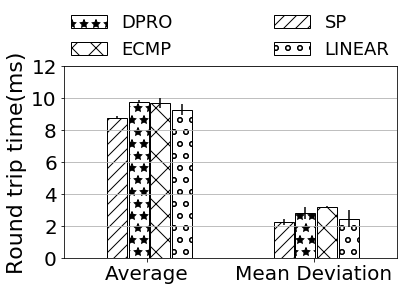

In [144]:
#rtt-1-2.pdf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

width = 6
high = width * 0.618
fig_size = [width, high]
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(0.5, 2.5)
ax.set_ylim(0, 12)

ticks_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ticks_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ax.set_xticks([1,2])

ax.set_yticks([0, 2,4,6,8,10,12])
ax.set_yticklabels(("0", "2","4","6","8","10","12"), fontdict=ticks_font_y)

# 设置x，y轴名称标签
label_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22} 
label_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22}  
width = 0.12

#rtt
ax.set_xticklabels(("Average", "Mean Deviation"), fontdict=ticks_font_x)
ax.set_ylabel(ylabel="Round trip time(ms)", fontdict=label_font_y)
SP=[8.777,2.2285]
sp_std=[0.09000000000000075,0.1875]
PPO=[9.764,2.7815]
ppo_std=[0.0940000000000003,0.36949999999999994]
ECMP=[9.71,3.169]
ecmp_std=[0.3250000000000002,0.04400000000000004]
LINEAR=[9.2794,2.456]
linear_std=[0.32950000000000035,0.5089999999999999]

b=plt.bar(x-0.5*width+0.01,PPO,width=width,fill=False,yerr=ppo_std,label='DPRO',fc='crimson',hatch="*")
c=plt.bar(x+0.5*width+0.02,ECMP,fill=False,yerr=ecmp_std,width=width,label='ECMP',fc='#3cb371',hatch="x")
a=plt.bar(x-1.5*width,SP,fill=False,yerr=sp_std,width=width,label='SP',fc='dodgerblue',hatch="//")
d=plt.bar(x+1.5*width+0.03,LINEAR,fill=False,yerr=linear_std,width=width,label="LINEAR",fc='#a4a09b',hatch='o')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0,1.0,1.0,1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=18, frameon=False)
plt.savefig('pic/packet-delay-1-2.pdf', format='pdf' ,dpi=1000,bbox_inches="tight")
#plt.show()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


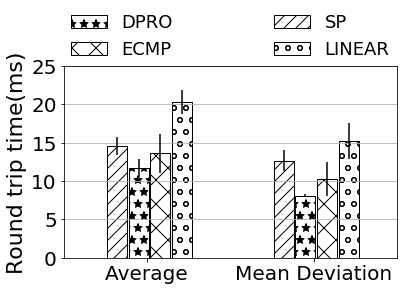

In [143]:
#packet-delay-with-bgf-1-2.pdf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

width = 6
high = width * 0.618
fig_size = [width, high]
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(0.5, 2.5)
ax.set_ylim(0, 25)

ticks_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ticks_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 20}  
ax.set_xticks([1,2])

ax.set_yticks([0, 5,10,15,20,25])
ax.set_yticklabels(("0", "5","10","15","20","25"), fontdict=ticks_font_y)

# 设置x，y轴名称标签
label_font_x = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22} 
label_font_y = {'family' : 'Arial',  
              'color'  : 'black',  
              'weight' : 'medium',  
              'size'   : 22}  
width = 0.12

#rtt-with-bgf
ax.set_xticklabels(("Average", "Mean Deviation"), fontdict=ticks_font_x)
ax.set_ylabel(ylabel="Round trip time(ms)", fontdict=label_font_y)
SP=[14.583,12.6905]
sp_std=[1.2110000000000003,1.4314999999999998]
PPO=[11.7255,8.1135]
ppo_std=[1.1375000000000002,0.19450000000000012]
ECMP=[13.663,10.2645]
ecmp_std=[2.5519999999999996,2.224500000000001]
LINEAR=[20.3465,15.2335]
linear_std=[1.5335,2.3294999999999995]

b=plt.bar(x-0.5*width+0.01,PPO,width=width,fill=False,yerr=ppo_std,label='DPRO',fc='crimson',hatch="*")
c=plt.bar(x+0.5*width+0.02,ECMP,fill=False,yerr=ecmp_std,width=width,label='ECMP',fc='#3cb371',hatch="x")
a=plt.bar(x-1.5*width,SP,fill=False,yerr=sp_std,width=width,label='SP',fc='dodgerblue',hatch="//")
d=plt.bar(x+1.5*width+0.03,LINEAR,fill=False,yerr=linear_std,width=width,label="LINEAR",fc='#a4a09b',hatch='o')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(bbox_to_anchor=(0,1.0,1.0,1.1), loc=3, ncol=2, mode="expand", borderaxespad=0, fontsize=18, frameon=False)
plt.savefig('pic/packet-delay-with-bgf-1-2.pdf', format='pdf' ,dpi=1000,bbox_inches="tight")
#plt.show()